In [99]:
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns
from matplotlib import pyplot as plt

In [110]:
dataset=pd.read_csv('winequality-white.csv')
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [113]:
dataset['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [114]:
dataset=dataset[dataset.quality !=3]
dataset=dataset[dataset.quality !=9]
dataset=dataset.reset_index(drop=True)


In [259]:
dataset['quality'].value_counts()
dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4868,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4869,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4870,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4871,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [117]:
import sklearn
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score


In [118]:
# stratified sampling

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(dataset, dataset["quality"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]


In [185]:
# Extract train and test features/labels

X_train=pd.DataFrame(strat_train_set[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
X_test=pd.DataFrame(strat_test_set[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])

y_train=strat_train_set.quality
y_test=strat_test_set.quality


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=pd.DataFrame(StandardScaler().fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test=pd.DataFrame(StandardScaler().fit_transform(X_test), columns=X_test.columns, index=X_test.index)

In [186]:
svm_clf = svm.SVC(gamma='auto')
svm_clf.fit(X_train, y_train)
# Predicting the Test set results
y_pred = clf.predict(X_test)
print('Test set score is', svm_clf.score(X_test, y_test))
print('Training set score is', svm_clf.score(X_train, y_train))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)

Test set score is 0.5702564102564103
Training set score is 0.6231400718317086
[[  3  18  12   0   0]
 [  0 165 126   0   0]
 [  0  81 346  13   0]
 [  0   2 128  46   0]
 [  0   0  26   9   0]]


In [187]:
#Classifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
forest_class = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest_class.fit(X_train, y_train)

# Predicting the Test set results
y_pred = forest_class.predict(X_test)
print('Test set score is', forest_class.score(X_test, y_test))
print('Training set score is', forest_class.score(X_train, y_train))
print('The f1_score of the test set is', f1_score(y_test, y_pred, average="macro"))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)

Test set score is 0.6030769230769231
Training set score is 0.9851205746536685
The f1_score of the test set is 0.527700447137698
[[ 10  18   5   0   0]
 [  5 184  99   3   0]
 [  2  89 306  42   1]
 [  0  10  86  75   5]
 [  0   1  11  10  13]]


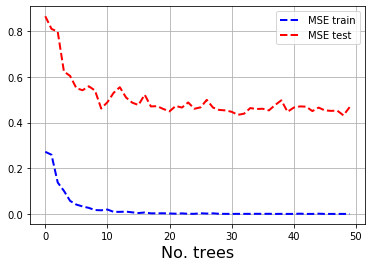

<Figure size 576x288 with 0 Axes>

In [188]:
rf = RandomForestClassifier(n_estimators=1)
mse_train_vec=np.zeros((50,1))
mse_test_vec=np.zeros((50,1))


for iter in range(50):
    rf.fit(X_train, y_train)
    y_train_predicted = rf.predict(X_train)
    y_test_predicted = rf.predict(X_test)
    mse_train_vec[iter] = mean_squared_error(y_train, y_train_predicted)
    mse_test_vec[iter] = mean_squared_error(y_test, y_test_predicted)
    rf.n_estimators += 1
    
plt.plot(range(50), mse_train_vec, "b--", label="MSE train", linewidth=2)
plt.plot(range(50), mse_test_vec, "r--", label="MSE test", linewidth=2)
plt.legend()
plt.xlabel("No. trees", fontsize=16)       
plt.grid(True)                              
plt.figure(figsize=(8, 4))                      
plt.show()

In [189]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=20),
        'max_features': randint(low=1, high=11),
        'min_samples_leaf': randint(low=1, high=20),
        'min_samples_split': randint(low=2, high=20),
        'max_depth': randint(low=1, high=10),
    }

rf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(rf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [190]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.7678105846459169 {'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 15, 'min_samples_split': 12, 'n_estimators': 8}
0.7772747116845627 {'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 19, 'min_samples_split': 12, 'n_estimators': 11}
0.7858092337665391 {'max_depth': 8, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 3}
0.7696460575315003 {'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 6}
0.8069096168779741 {'max_depth': 2, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 12}
0.7568737515819669 {'max_depth': 9, 'max_features': 1, 'min_samples_leaf': 10, 'min_samples_split': 17, 'n_estimators': 15}
0.7944135372320303 {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 19}
0.7539871782440255 {'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 9, 'min_samples_split': 8, 'n_estimators': 18}
0.7838479763812385 

In [191]:
rnd_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=18,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [192]:
# see them close to their name
feature_importances = rnd_search.best_estimator_.feature_importances_
attributes = list(X)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.25805418846547856, 'alcohol'),
 (0.15613703030810344, 'volatile acidity'),
 (0.11569662646589934, 'density'),
 (0.077275369915811, 'residual sugar'),
 (0.07432431966096617, 'free sulfur dioxide'),
 (0.06482633908212904, 'citric acid'),
 (0.06146997595412825, 'pH'),
 (0.059923145355594745, 'total sulfur dioxide'),
 (0.05193798976861219, 'chlorides'),
 (0.04048774363766306, 'fixed acidity'),
 (0.0398672713856143, 'sulphates')]

In [193]:
final_model = rnd_search.best_estimator_

# Predicting the Test set results
y_pred = final_model.predict(X_test)
print('Test set score is', final_model.score(X_test, y_test))
print('Training set score is', final_model.score(X_train, y_train))
print('The f1_score of the test set is', f1_score(y_test, y_pred, average="macro"))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)

Test set score is 0.5528205128205128
Training set score is 0.646228835300154
The f1_score of the test set is 0.32150890260410386
[[  1  19  12   1   0]
 [  0 164 125   2   0]
 [  0  85 330  25   0]
 [  0   2 130  44   0]
 [  0   0  27   8   0]]


/Users/mkhoi/.conda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [210]:
X_train_drop=pd.DataFrame(strat_train_set[['fixed acidity','volatile acidity','citric acid','chlorides','total sulfur dioxide','density','pH']])
X_test_drop=pd.DataFrame(strat_test_set[['fixed acidity','volatile acidity','citric acid','chlorides','total sulfur dioxide','density','pH']])

y_train=strat_train_set.quality
y_test=strat_test_set.quality


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_drop=pd.DataFrame(StandardScaler().fit_transform(X_train_drop), columns=X_train_drop.columns, index=X_train_drop.index)
X_test_drop=pd.DataFrame(StandardScaler().fit_transform(X_test_drop), columns=X_test_drop.columns, index=X_test_drop.index)

In [216]:
param_distribs = {
        'n_estimators': randint(low=1, high=20),
        'max_features': randint(low=1, high=7),
        'min_samples_leaf': randint(low=1, high=20),
        'min_samples_split': randint(low=2, high=20),
        'max_depth': randint(low=1, high=10),
    }

rf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(rf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train_drop, y_train)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [217]:
feature_importances = rnd_search.best_estimator_.feature_importances_
attributes = list(X_train_drop)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.27364178616758805, 'density'),
 (0.20381252650144896, 'volatile acidity'),
 (0.14837814749133318, 'chlorides'),
 (0.11570359872381891, 'citric acid'),
 (0.10128292024147897, 'pH'),
 (0.09366806358089734, 'total sulfur dioxide'),
 (0.06351295729343454, 'fixed acidity')]

In [218]:
final_model = rnd_search.best_estimator_

# Predicting the Test set results
y_pred = final_model.predict(X_test_drop)
print('Test set score is', final_model.score(X_test_drop, y_test))
print('Training set score is', final_model.score(X_train_drop, y_train))
print('The f1_score of the test set is', f1_score(y_test, y_pred, average="macro"))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)

Test set score is 0.518974358974359
Training set score is 0.624935864545921
The f1_score of the test set is 0.29058195330181313
[[  0  19  11   3   0]
 [  0 154 133   4   0]
 [  0  93 309  38   0]
 [  0   5 128  43   0]
 [  0   1  25   9   0]]


/Users/mkhoi/.conda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [265]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)
principalComponents = pca.fit_transform(X_train)
X_train_PC = pd.DataFrame(data = principalComponents)
X_test_PC = pca.transform(X_test)

In [266]:
X_train_PC

,0,1,2,3,4,5,6,7,8
0,-0.910053,-0.343303,-0.827503,0.316704,-0.023302,0.733540,0.217060,0.330187,-1.042124
1,-0.898946,2.117210,0.544159,-1.537058,0.321523,-0.953273,0.238315,0.173996,1.050635
2,0.166778,-1.459801,0.005087,1.155330,1.375460,0.576159,0.611965,0.372905,0.930712
3,-2.378798,0.163823,0.224456,-0.770752,-0.897109,-0.766884,-0.154888,-0.528238,0.410952
4,-2.525477,1.643357,-1.027254,-0.292886,0.778754,0.269925,0.065529,-0.637326,-0.082690
...,...,...,...,...,...,...,...,...,...
3893,-2.618945,-1.034484,-0.157637,-0.884603,-0.593040,-0.622796,1.197132,-0.303622,0.624928
3894,-2.281334,-0.435291,-0.808113,0.731525,1.253962,0.504785,-0.325030,-0.571537,-0.097876
3895,-1.799064,0.384646,1.540701,0.047912,-0.033038,-1.343438,0.645274,0.049931,-0.119736
3896,0.541238,0.635530,-0.899221,-0.186322,-0.041083,-0.855694,-1.286225,1.352683,0.000096


In [267]:
param_distribs = {
        'n_estimators': randint(low=1, high=10),
        'max_features': randint(low=1, high=9),
        #'min_samples_leaf': randint(low=1, high=20),
        #'min_samples_split': randint(low=2, high=20),
        #'max_depth': randint(low=1, high=10),
    }

rf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(rf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train_PC, y_train)



RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [268]:
final_model = rnd_search.best_estimator_

# Predicting the Test set results
y_pred = final_model.predict(X_test_PC)
print('Test set score is', final_model.score(X_test_PC, y_test))
print('Training set score is', final_model.score(X_train_PC, y_train))
print('The f1_score of the test set is', f1_score(y_test, y_pred, average="macro"))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)

Test set score is 0.5856410256410256
Training set score is 0.9792201128783992
The f1_score of the test set is 0.4981859669839913
[[ 10  14   9   0   0]
 [  4 186  96   4   1]
 [  1 106 293  37   3]
 [  1  13  88  73   1]
 [  0   1  12  13   9]]


In [262]:
#Classifier
forest_class = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest_class.fit(X_train_PC, y_train)

# Predicting the Test set results
y_pred = forest_class.predict(X_test_PC)
print('Test set score is', forest_class.score(X_test_PC, y_test))
print('Training set score is', forest_class.score(X_train_PC, y_train))
print('The f1_score of the test set is', f1_score(y_test, y_pred, average="macro"))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)

Test set score is 0.49230769230769234
Training set score is 0.9794766546947152
The f1_score of the test set is 0.3843158121030673
[[  9  16   6   2   0]
 [  1 168 107  14   1]
 [  4 126 250  57   3]
 [  0  24 101  50   1]
 [  0  10  13   9   3]]
